In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Grid
import numpy as np
import pandas as pd
import seaborn as sb

%matplotlib inline

In [2]:
os.getcwd()

'/home/anthony/summer-bursary-2018/bacteria'

In [3]:
os.listdir('data')

['Classific.py',
 'graphs.pdf',
 'growth_stages.csv',
 '16ms_32ms_growth_phase_spectra.csv',
 'PC6allwavelengths.png',
 'wavelengths.csv',
 '16_ms_lag_codes.csv']

In [4]:
df = pd.read_csv('data/growth_stages.csv', index_col=[0], header=[0,1,2])
wavelengths_df = pd.read_csv('data/wavelengths.csv', index_col=[0], header=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Columns: 135 entries, (lag, bc, 01) to (stat, se, 07)
dtypes: float64(135)
memory usage: 1.1 MB


In [6]:
df.describe()

growth_stage          lag                                                      \
species                bc                                                       
replicate              01           02           03           04           05   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           340.917966   218.282554   410.265450   402.411758   147.930946   
std            517.453981   328.263253   632.792734   584.358827   213.381498   
min             -3.510400    -2.800760    -2.581292    -2.554170    -2.985820   
25%              3.738191     2.116139     3.614560     4.258268     3.017208   
50%             40.780240    27.023980    48.616896    58.972290    24.396270   
75%            496.754350   319.173550   571.801010   629.260350   223.730650   
max           1649.755000  1044.867000  2050.509445  1755.384000   670.982500   

growth_stage                                                                   \
species                                                                         
replicate              06           07           08           09           10   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           304.443366   690.243351   615.625463   508.217097   267.395909   
std            457.365956  1076.320701  1006.404767   829.675942   411.266389   
min             -3.429370    -2.280780    -4.327390    -3.340390   -24.324100   
25%              3.429760     4.382186     3.291279     3.093110    -1.435505   
50%             37.316280    78.138510    46.407810    41.594080    26.498390   
75%            446.739200   940.880800   775.154550   630.964700   401.714900   
max           1426.308000  3542.053000  3369.752000  2848.575000  1316.226000   

growth_stage     ...              stat                                         \
species          ...                sa                                     se   
replicate        ...                06           07           08           01   
count            ...       1043.000000  1043.000000  1043.000000  1043.000000   
mean             ...       1319.282527  1617.105057  1424.455291   332.375709   
std              ...       2183.988762  2683.151537  2381.357464   525.271213   
min              ...        -18.529200    -2.563420    -1.462970    -2.361310   
25%              ...         11.080080    12.687795    10.883005     2.919165   
50%              ...        107.911900   130.242300   104.561900    33.991250   
75%              ...       1577.928000  1936.329500  1679.898000   436.948300   
max              ...       7512.713000  9235.687000  8223.580000  1713.175000   

growth_stage                                                                   \
species                                                                         
replicate              02           03           04           05           06   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           464.757981   346.619581   591.019431   944.666722   683.460369   
std            783.676339   589.041597  1030.124114  1631.945511  1174.686894   
min             -3.337340    -2.003951    -2.814100    -3.369360    -3.098660   
25%              3.433975     2.271594     7.036556     5.055340     3.809488   
50%             34.734540    22.254616    41.866360    52.880860    42.561820   
75%            533.983350   395.229638   603.002400  1030.629000   753.640300   
max           2670.119000  2010.552740  3632.655000  5669.533000  4091.082000   

growth_stage               
species                    
replicate              07  
count         1043.000000  
mean           871.476315  
std           1501.994463  
min             -3.450760  
25%              5.207000  
50%             52.886240  
75%            957.149050  
max           5218.670000  

[8 rows x 135 columns]

In [7]:
df.columns

MultiIndex(levels=[['lag', 'log', 'stat'], ['bc', 'ec', 'lm', 'pa', 'sa', 'se'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3

In [8]:
df.head()

growth_stage       lag                                                    \
species             bc                                                     
replicate           01        02        03        04        05        06   
0             0.000000  0.622353  0.064528 -1.094650 -1.492810 -0.979760   
1             1.560060 -2.115990  0.645279 -2.554170 -0.559800 -0.061230   
2             0.715025  0.062234 -1.032450 -0.912210  2.923387  0.489875   
3            -0.520060  2.178335 -2.064991  0.851433  3.047967 -1.530940   
4             0.130014  1.867163 -1.419711  3.709871  2.985793  0.000003   

growth_stage                                            ...         stat  \
species                                                 ...           sa   
replicate           07        08        09        10    ...           06   
0            -0.240070  0.060945  0.247423  2.628512    ...     1.757536   
1             0.600163 -0.792280  0.123709  0.292028    ...    -2.071090   
2             0.540146  0.182837 -0.742270 -0.408840    ...    -2.071340   
3            -1.200400  0.853271  1.360885 -5.741500    ...     3.714417   
4             1.260425 -3.047420  2.226921  4.453517    ...    -2.644110   

growth_stage                                                              \
species                                 se                                 
replicate           07        08        01        02        03        04   
0            -0.525800 -0.182860  0.918231  1.283523 -0.734724  0.183516   
1            -0.328620 -0.853340 -0.655870  0.192528 -1.269057 -1.345770   
2            -0.985860 -0.182860  0.393521  1.219347 -1.669815  0.367029   
3             1.117374  2.255372 -1.180630 -3.337340 -0.667963  1.590540   
4             0.591557  0.975300  1.246246  1.604498  0.868363  0.917630   

growth_stage                                
species                                     
replicate           05        06        07  
0             2.187136 -0.774600  0.423758  
1            -1.004900 -0.193650  1.089653  
2            -3.369360 -1.032800 -0.363220  
3            -1.477880 -0.645540 -1.574020  
4            -0.886730  1.420193 -1.816200  

[5 rows x 135 columns]

In [9]:
wavelengths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Data columns (total 1 columns):
1    1043 non-null float64
dtypes: float64(1)
memory usage: 16.3 KB


In [10]:
wavelengths_df.describe()

,1
count,1043.000000
mean,594.306442
std,112.580390
min,395.494100
25%,497.482200
50%,596.374400
75%,692.170600
max,784.870900


In [11]:
wavelengths_df.head()

,1
0,
0,395.4941
1,395.8915
2,396.2889
3,396.6863
4,397.0836


In [12]:
assert len(wavelengths_df) == len(df)

Text(0, 0.5, 'Fluorescence Spectra')

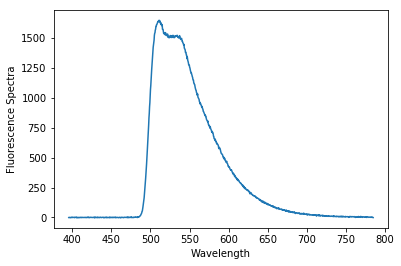

In [13]:
plt.plot(wavelengths_df, df['lag', 'bc', '01'])
plt.xlabel('Wavelength')
plt.ylabel('Fluorescence Spectra')

In [14]:
growth_stages = df.columns.levels[0]
print(growth_stages)

Index(['lag', 'log', 'stat'], dtype='object', name='growth_stage')


In [15]:
species = df.columns.levels[1]
print(species)

Index(['bc', 'ec', 'lm', 'pa', 'sa', 'se'], dtype='object', name='species')


In [16]:
def plot_growth_stage(growth_stage):
    fig = plt.figure(figsize=(15, 10))

    grid = Grid(fig, rect=111, nrows_ncols=(2,3),
                axes_pad=0.5, label_mode='L', 
                share_y=True)
    
    y_min = df[growth_stage].unstack().min() * 1.1
    y_max = df[growth_stage].unstack().max() * 1.1
    ylim = (y_min, y_max)

    for grid_axis, s in zip(grid, species):        
        df_axis = df[growth_stage, s].plot(ax=grid_axis, ylim=ylim)
        df_axis.set(xlabel='Wavelength', 
                    ylabel='Flourescence Spectra', 
                    title='%s' % s)

    fig.suptitle('Flourescence Spectra at %s Growth Stage by Species' % growth_stage.capitalize())
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

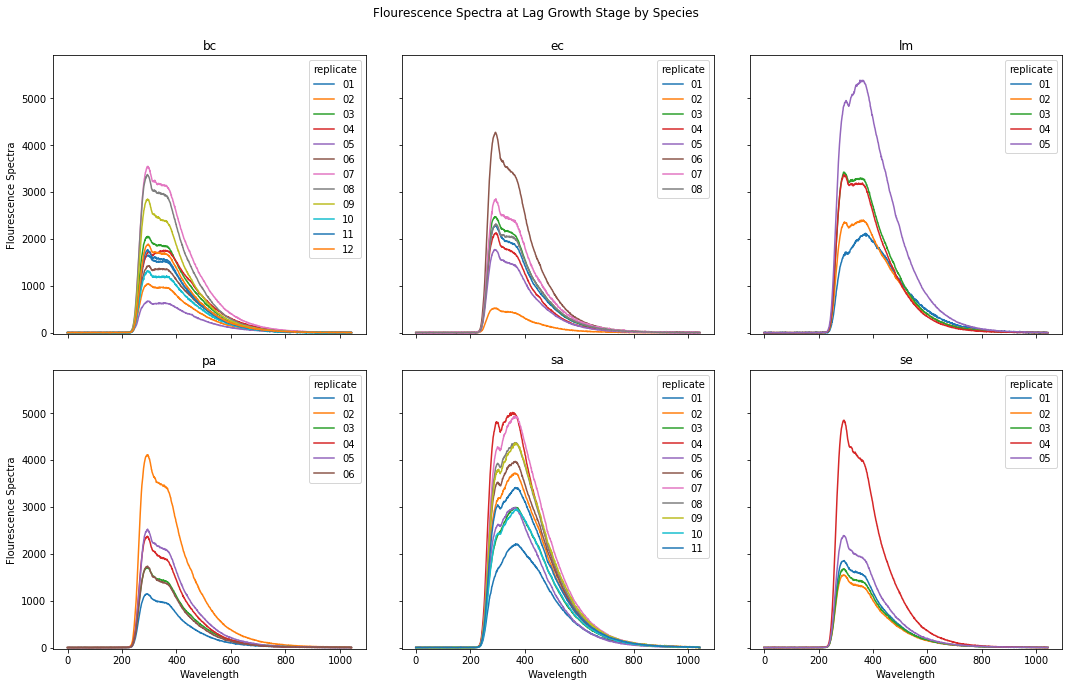

In [17]:
plot_growth_stage(growth_stages[0])

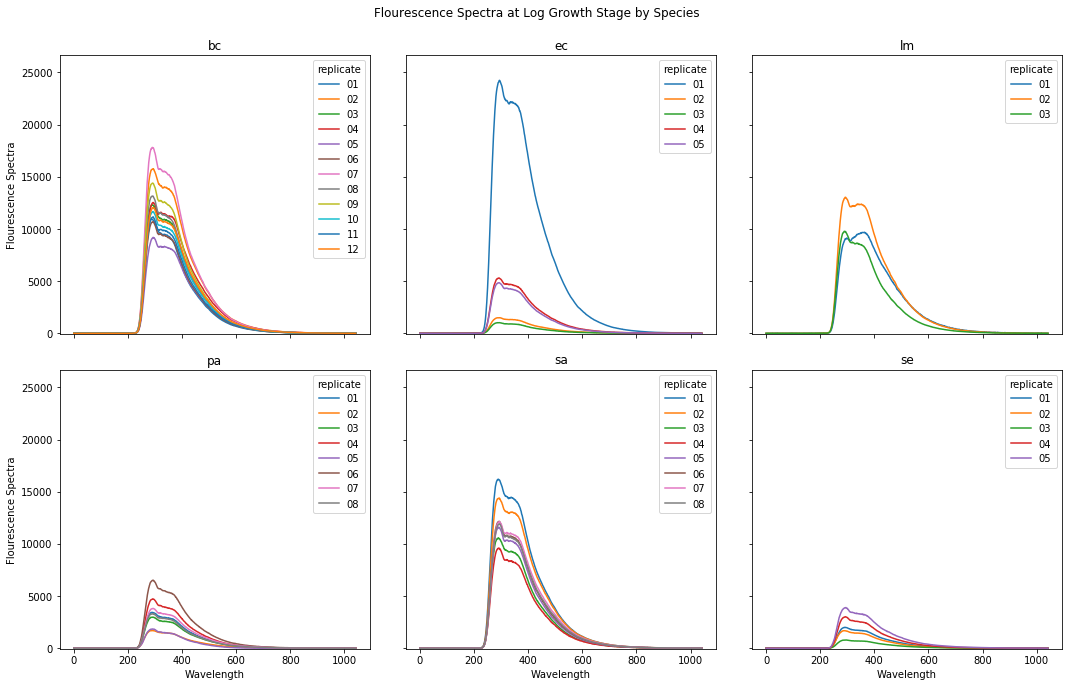

In [18]:
plot_growth_stage(growth_stages[1])

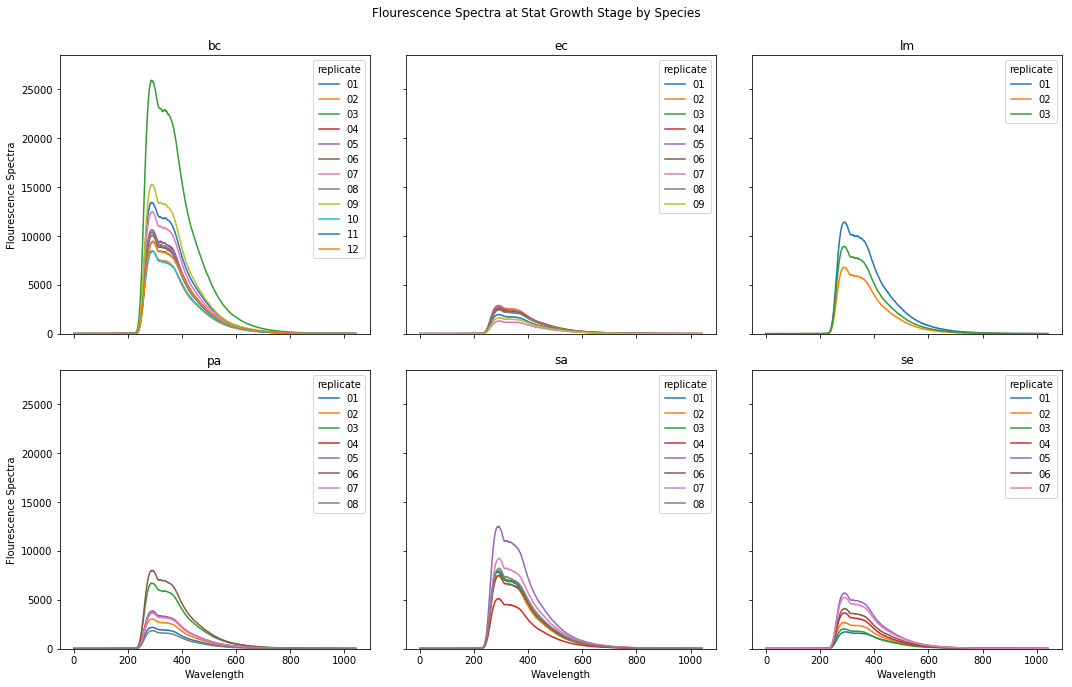

In [19]:
plot_growth_stage(growth_stages[2])

In [20]:
def shade_std(data, ax, color='gray', alpha=0.3, n_deviations=0):
    """Shade the area covered by n standard deviations, minus the area covered by (n - 1) standard deviations.
    
    Arguments:
        data: the data to plot.
        ax: the Axis object to plot on.
        color: the color to shade with.
        alpha: the alpha of the shaded area.
        n_deviations: the number of standard deviations to shade.
    """
    assert n_deviations >= 0
    
    mean = data.mean(axis=1)
    std = data.std(axis=1)
    
    std_low_prev = (mean - (n_deviations - 1) * std).clip(lower=0)
    std_high_prev = (mean + (n_deviations - 1) * std).clip(lower=0)
    std_low = (mean - n_deviations * std).clip(lower=0)
    std_high = (mean + n_deviations * std).clip(lower=0)

    ax.fill_between(std.index, std_low_prev, std_low, 
                    facecolor=color, 
                    alpha=alpha
                   )
    ax.fill_between(std.index, std_high_prev, std_high, 
                    facecolor=color, 
                    label='$\pm %d \sigma$' % n_deviations, 
                    alpha=alpha
                   )

def plot_growth_stage_stats(growth_stage, shading_alpha=0.3, shading_colors=('blue', 'orange', 'red')):
    """Plot μ and a shaded area for ±2σ.
    
    Arguments:
        growth_stage: The growth stage to plot.
        shading_alpha: The alpha of the shaded standard deviations.
        shading_colors: The colors to use for shading the standard deviations.
    """
                            
    assert len(shading_colors) == 3
    
    fig = plt.figure(figsize=(15, 10))

    grid = Grid(fig, rect=111, nrows_ncols=(2,3),
                axes_pad=0.5, label_mode='L', 
                share_y=True)
    
    y_min = 0
    
    per_species_mean = df[growth_stage].groupby(level=0, axis=1).mean()
    per_species_stage_std = df[growth_stage].groupby(level=0, axis=1).std()
    
    y_max = (per_species_mean + 3 * per_species_stage_std).unstack().max()
    y_lim = (y_min, y_max * 1.1)

    for grid_axis, s in zip(grid, species):
        mean = df[growth_stage, s].mean(axis=1)
        
        grid_axis.set(ylim=y_lim)
        
        shade_std(df[growth_stage, s], grid_axis, color=shading_colors[0], n_deviations=1)
        shade_std(df[growth_stage, s], grid_axis, color=shading_colors[1], n_deviations=2)
        shade_std(df[growth_stage, s], grid_axis, color=shading_colors[2], n_deviations=3)
        
        df_axis = mean.plot(ax=grid_axis, style='-k', label='mean')
        
        df_axis.set(xlabel='Wavelength', 
                    ylabel='Flourescence Spectra', 
                    title='%s' % s)
        df_axis.legend()

    fig.suptitle('Flourescence Spectra at %s Growth Stage by Species' % growth_stage.capitalize())
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

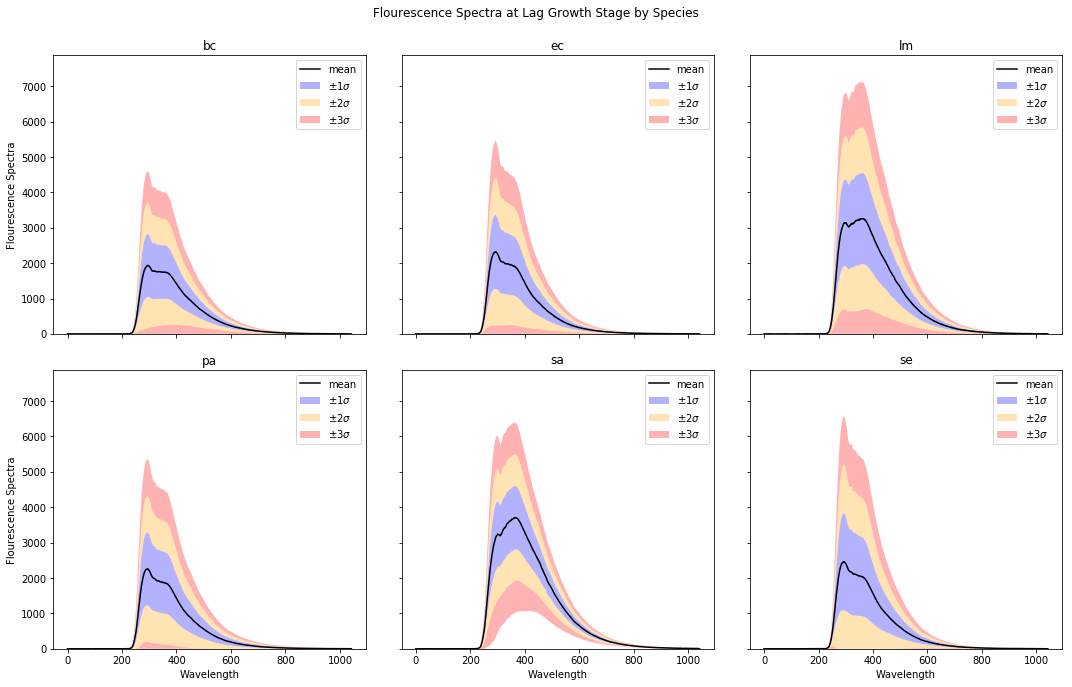

In [21]:
plot_growth_stage_stats(growth_stages[0])

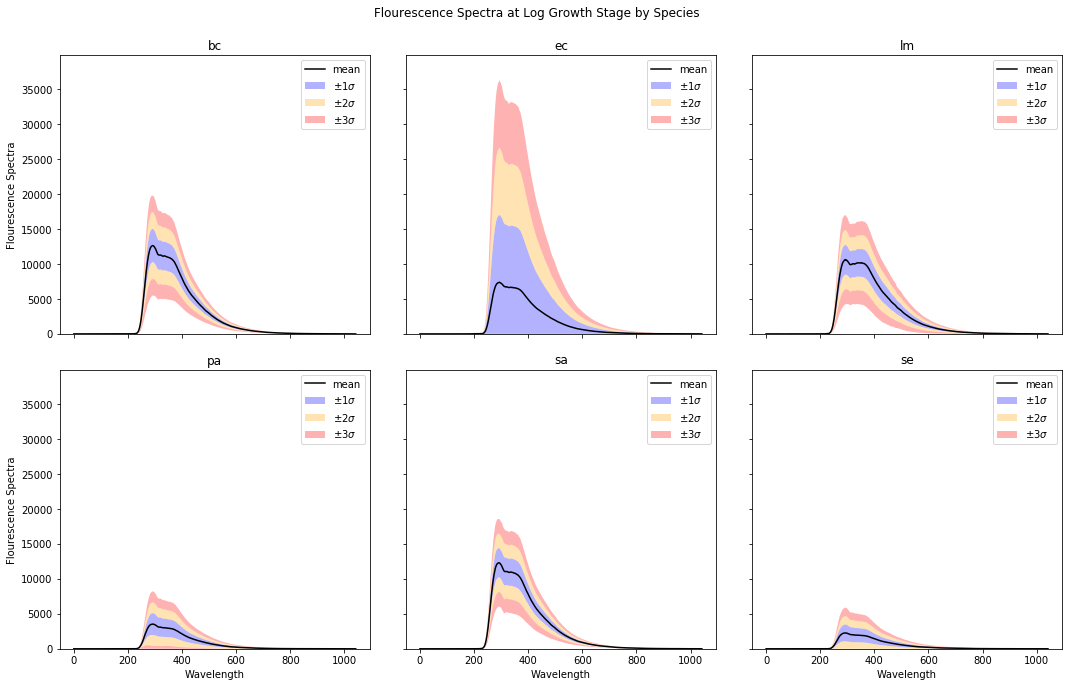

In [22]:
plot_growth_stage_stats(growth_stages[1])

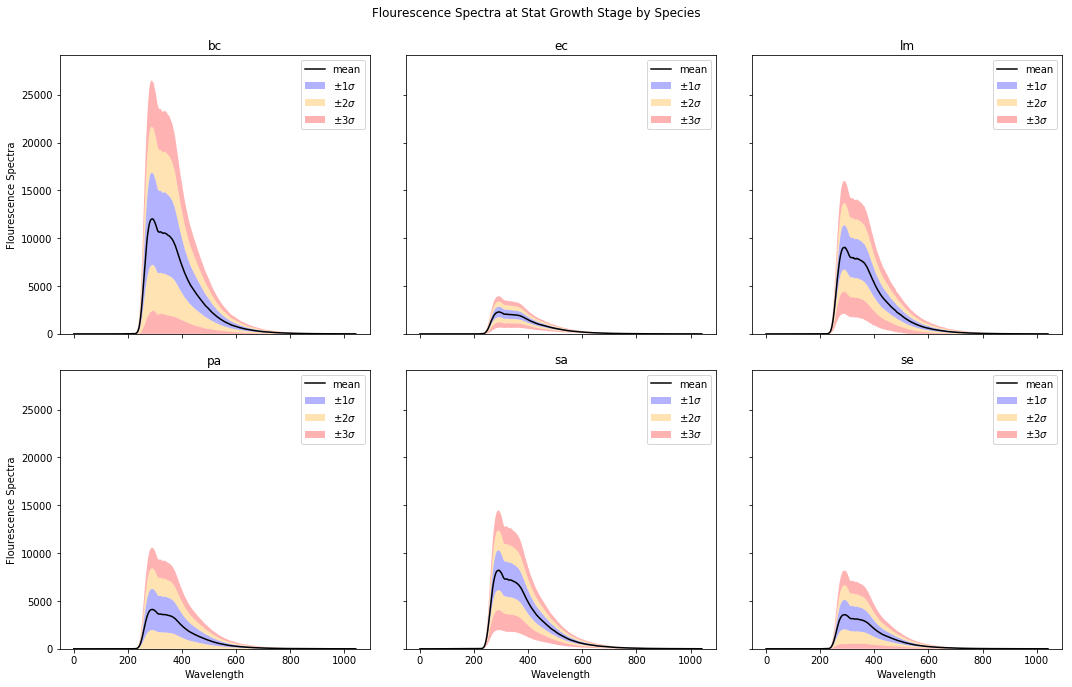

In [23]:
plot_growth_stage_stats(growth_stages[2])